<a href="https://colab.research.google.com/github/praveenkummari1126/Python_coding_practice/blob/main/ML_Project_1_Praveen_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#data preparation
import pandas as pd
import numpy as np

np.random.seed(42)  # for reproducibility

n = 500

data = {
    'customer_id': np.arange(1001, 1001 + n),
    'gender': np.random.choice(['Male', 'Female'], size=n),
    'age': np.random.randint(18, 70, size=n),
    'annual_income': np.random.randint(30000, 120000, size=n),
    'tenure_months': np.random.randint(1, 60, size=n),
    'plan_type': np.random.choice(['Basic', 'Standard', 'Premium'], size=n, p=[0.4, 0.35, 0.25]),
    'monthly_charges': np.random.choice([40, 55, 70], size=n, p=[0.4, 0.35, 0.25]),
}

# Calculate total_spending as monthly_charges * tenure_months + some noise
data['total_spending'] = (data['monthly_charges'] * data['tenure_months'] + np.random.randint(-20, 20, size=n)).astype(int)

data['num_support_calls'] = np.random.poisson(lam=1.5, size=n)
data['is_active'] = np.random.choice([0, 1], size=n, p=[0.3, 0.7])
data['last_login_days_ago'] = np.random.randint(0, 60, size=n)
data['churn'] = np.random.choice([0, 1], size=n, p=[0.75, 0.25])

df = pd.DataFrame(data)

df.to_csv('customer_data_latest.csv', index=False)

I am loading sample customer files from
/customer_data_latest.csv

1) Customer Segmentation using K-Means clustering

In [ ]:
#importing basic libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import sklearn libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#loading the cust data
cust_data = pd.read_csv('/content/customer_data_latest.csv')
cust_data.dropna(how='all', inplace=True)
cust_data.head(11)

# convert float datatypes to integers
float_cols = cust_data.select_dtypes(include=['float64']).columns
cust_data[float_cols] = cust_data[float_cols].astype(int)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cust_data.head(10)

,customer_id,gender,age,annual_income,tenure_months,plan_type,monthly_charges,total_spending,num_support_calls,is_active,last_login_days_ago,churn
0,1001,Male,38,91886,38,Standard,40,1518,2,0,9,0
1,1002,Female,49,105745,34,Basic,55,1852,2,1,58,0
2,1003,Male,40,113251,17,Premium,55,933,1,1,38,0
3,1004,Male,50,83413,37,Standard,40,1468,2,1,57,0
4,1005,Male,20,86800,25,Standard,40,1007,2,1,14,0
5,1006,Female,35,72318,38,Basic,70,2659,0,0,6,0
6,1007,Male,42,100173,58,Premium,55,3176,6,1,28,0
7,1008,Male,59,100390,12,Standard,40,473,0,0,58,0
8,1009,Male,48,82329,23,Basic,70,1598,2,0,46,0
9,1010,Female,20,73088,53,Basic,40,2118,2,1,2,0


[364659442957.3118, 85229090370.4994, 35779658015.33276, 20592630986.132114, 15304349292.598454, 8800813549.519548, 7081789639.943062, 5116117266.952112, 3909680750.3021913]


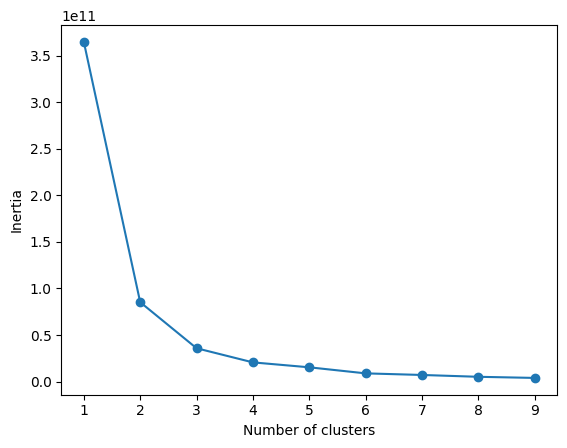

In [ ]:
#get the correct K values using elbow method
inertia=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(cust_data[['age','annual_income']])
  inertia.append(kmeans.inertia_)
print(inertia)
plt.plot(range(1,10),inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

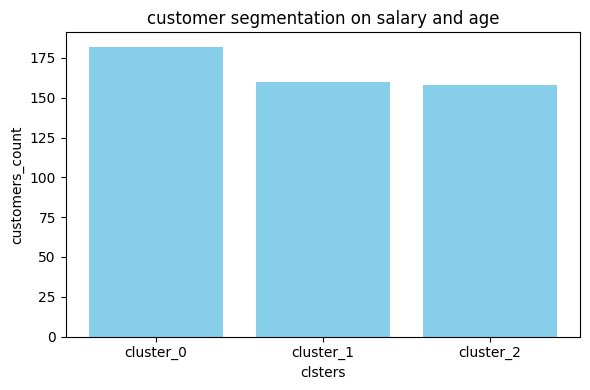

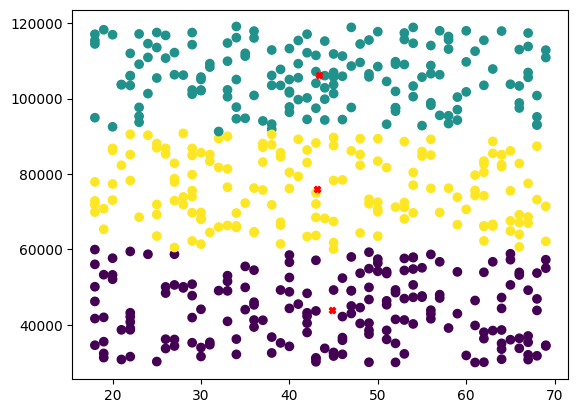

In [ ]:
#from elbow method we got k=3 as preferred value hence c_cluster=3
kmeans=KMeans(n_clusters=3)
y_kmeans= kmeans.fit_predict(cust_data[['age','annual_income']])
#adding new column Cluster for segemntation and ploting the centrids
cust_data['Cluster']= y_kmeans
#print(cust_data)

#printing bar chat on customer segmentation

cust_data1= cust_data[cust_data['Cluster']==0]
cust_data2= cust_data[cust_data['Cluster']==1]
cust_data3= cust_data[cust_data['Cluster']==2]
c0=cust_data1['customer_id'].count()
c1=cust_data2['customer_id'].count()
c2=cust_data3['customer_id'].count()
values= [c0,c1,c2]
labels = ['cluster_0','cluster_1','cluster_2']
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='skyblue')
plt.xlabel("clsters")
plt.ylabel("customers_count")
plt.title("customer segmentation on salary and age")
plt.tight_layout()
plt.show()

#Printing the scatter chart of segmentation and centroids

plt.scatter(cust_data['age'],cust_data['annual_income'],c= cust_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', marker='X')
plt.show()

R-squared: 0.9609024173203004
Root Mean Squared Error (RMSE): 42813.85687921764


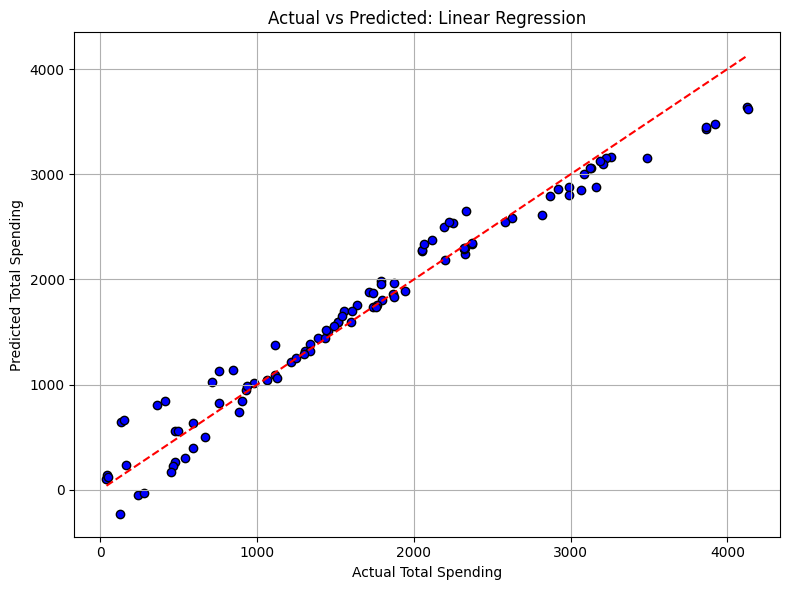

Confusion Matrix:
 [[78  0]
 [22  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        78
           1       0.00      0.00      0.00        22

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100


Accuracy Score: 0.78


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = cust_data[['age', 'annual_income', 'tenure_months', 'monthly_charges']]
y = cust_data['total_spending']

#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on test data
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Root Mean Squared Error (RMSE):', rmse)


import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Total Spending')
plt.ylabel('Predicted Total Spending')
plt.title('Actual vs Predicted: Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

#3)Churn analysis using Logistic regression



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X=cust_data[['age','annual_income','total_spending','is_active']]
#print(X)
y=cust_data['churn']

#split train data(80%) and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(y_test)
#Train model
model=LogisticRegression()
model.fit(X_train,y_train)

#predict on test data
y_pred=model.predict(X_test)
#print(y_pred)
#get the metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#get precision,recall,F1 score, accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

2)getting total_spending prediction linear regression  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = cust_data[['age', 'annual_income', 'tenure_months', 'monthly_charges']]
y = cust_data['total_spending']

#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on test data
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Root Mean Squared Error (RMSE):', rmse)

R-squared: 0.9609024173203004
Root Mean Squared Error (RMSE): 42813.85687921764


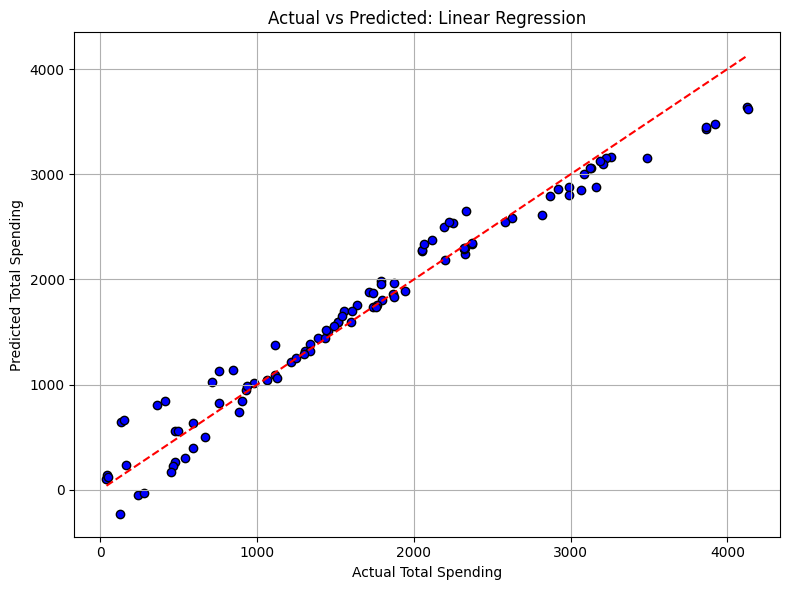

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Total Spending')
plt.ylabel('Predicted Total Spending')
plt.title('Actual vs Predicted: Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

3)Churn analysis using Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X=cust_data[['age','annual_income','total_spending','is_active']]
#print(X)
y=cust_data['churn']

#split train data(80%) and test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(y_test)
#Train model
model=LogisticRegression()
model.fit(X_train,y_train)

#predict on test data
y_pred=model.predict(X_test)
#print(y_pred)
#get the metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#get precision,recall,F1 score, accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[78  0]
 [22  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        78
           1       0.00      0.00      0.00        22

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100


Accuracy Score: 0.78
